In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
'''import pandas as pd
import json

# Replace 'your_file.txt' with the path to your .txt file containing JSON data
file_path = r'D:\Ineuron\Ml_projects\Fraud_Detection\transactions\transactions.txt'

# Initialize a list to hold the JSON objects
json_objects = []

# Read the file line by line (assuming each line is a separate JSON object)
with open(file_path, 'r') as file:
    for line in file:
        try:
            # Load each line as a separate JSON object and append to the list
            json_objects.append(json.loads(line.strip()))
        except json.JSONDecodeError:
            # If there is an error decoding, skip that line
            continue

# Convert the list of JSON objects into a pandas DataFrame
df = pd.json_normalize(json_objects)

# Save the DataFrame as a CSV file
df.to_csv('Fraud_Detection.csv', index=False)

print("Data has been successfully converted to CSV.")
'''


'import pandas as pd\nimport json\n\n# Replace \'your_file.txt\' with the path to your .txt file containing JSON data\nfile_path = r\'D:\\Ineuron\\Ml_projects\\Fraud_Detection\transactions\transactions.txt\'\n\n# Initialize a list to hold the JSON objects\njson_objects = []\n\n# Read the file line by line (assuming each line is a separate JSON object)\nwith open(file_path, \'r\') as file:\n    for line in file:\n        try:\n            # Load each line as a separate JSON object and append to the list\n            json_objects.append(json.loads(line.strip()))\n        except json.JSONDecodeError:\n            # If there is an error decoding, skip that line\n            continue\n\n# Convert the list of JSON objects into a pandas DataFrame\ndf = pd.json_normalize(json_objects)\n\n# Save the DataFrame as a CSV file\ndf.to_csv(\'Fraud_Detection.csv\', index=False)\n\nprint("Data has been successfully converted to CSV.")\n'

In [3]:
df = pd.read_csv('Fraud_Detection.csv')

In [4]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [5]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [6]:
df.shape

(786363, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  float64
 10  posConditionCode          785954 non-null  float64
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [8]:
DF= df[0:10000]

In [9]:
DF.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [10]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   accountNumber             10000 non-null  int64  
 1   customerId                10000 non-null  int64  
 2   creditLimit               10000 non-null  float64
 3   availableMoney            10000 non-null  float64
 4   transactionDateTime       10000 non-null  object 
 5   transactionAmount         10000 non-null  float64
 6   merchantName              10000 non-null  object 
 7   acqCountry                9941 non-null   object 
 8   merchantCountryCode       9992 non-null   object 
 9   posEntryMode              9925 non-null   float64
 10  posConditionCode          9995 non-null   float64
 11  merchantCategoryCode      10000 non-null  object 
 12  currentExpDate            10000 non-null  object 
 13  accountOpenDate           10000 non-null  object 
 14  dateOfL

In [11]:


col = ['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd']
DF.drop(col,axis=1,inplace=True)

In [12]:
len(DF.columns)

23

In [13]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   accountNumber             10000 non-null  int64  
 1   customerId                10000 non-null  int64  
 2   creditLimit               10000 non-null  float64
 3   availableMoney            10000 non-null  float64
 4   transactionDateTime       10000 non-null  object 
 5   transactionAmount         10000 non-null  float64
 6   merchantName              10000 non-null  object 
 7   acqCountry                9941 non-null   object 
 8   merchantCountryCode       9992 non-null   object 
 9   posEntryMode              9925 non-null   float64
 10  posConditionCode          9995 non-null   float64
 11  merchantCategoryCode      10000 non-null  object 
 12  currentExpDate            10000 non-null  object 
 13  accountOpenDate           10000 non-null  object 
 14  dateOfL

In [14]:
cat_col = [i for i in DF.columns if DF[i].dtypes == 'O']
num_col = [i for i in DF.columns if DF[i].dtypes != 'O']

In [15]:
DF[cat_col].head()

,transactionDateTime,merchantName,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType
0,2016-08-13T14:27:32,Uber,US,US,rideshare,06/2023,2015-03-14,2015-03-14,PURCHASE
1,2016-10-11T05:05:54,AMC #191138,US,US,entertainment,02/2024,2015-03-14,2015-03-14,PURCHASE
2,2016-11-08T09:18:39,Play Store,US,US,mobileapps,08/2025,2015-03-14,2015-03-14,PURCHASE
3,2016-12-10T02:14:50,Play Store,US,US,mobileapps,08/2025,2015-03-14,2015-03-14,PURCHASE
4,2016-03-24T21:04:46,Tim Hortons #947751,US,US,fastfood,10/2029,2015-08-06,2015-08-06,PURCHASE


In [16]:
DF[num_col].head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,98.55,2.0,1.0,414,414,1803,0.0,False,False,False
1,737265056,737265056,5000.0,5000.0,74.51,9.0,1.0,486,486,767,0.0,True,False,False
2,737265056,737265056,5000.0,5000.0,7.47,9.0,1.0,486,486,767,0.0,False,False,False
3,737265056,737265056,5000.0,5000.0,7.47,9.0,1.0,486,486,767,0.0,False,False,False
4,830329091,830329091,5000.0,5000.0,71.18,2.0,1.0,885,885,3143,0.0,True,False,False


In [17]:
DF.describe(include='all')

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
count,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000,10000.000000,10000,9941,9992,9925.000000,...,10000,10000,10000.00000,10000.00000,10000.000000,9991,10000.000000,10000,10000,10000
unique,NaN,NaN,NaN,NaN,9999,NaN,1699,4,4,NaN,...,72,104,NaN,NaN,NaN,3,NaN,2,2,2
top,NaN,NaN,NaN,NaN,2016-05-11T22:13:34,NaN,Uber,US,US,NaN,...,2012-10-14,2013-11-19,NaN,NaN,NaN,PURCHASE,NaN,False,False,False
freq,NaN,NaN,NaN,NaN,2,NaN,351,9852,9901,NaN,...,1358,619,NaN,NaN,NaN,9496,NaN,5843,9994,9855
mean,6.266151e+08,6.266151e+08,10311.925000,5761.775072,NaN,135.995562,NaN,NaN,NaN,9.521814,...,NaN,NaN,478.96250,478.64650,4898.705400,NaN,4550.149928,NaN,NaN,NaN
std,3.092433e+08,3.092433e+08,14107.608284,9034.735102,NaN,147.916355,NaN,NaN,NaN,17.848997,...,NaN,NaN,245.21921,245.13138,2702.428965,NaN,9013.225656,NaN,NaN,NaN
min,1.013807e+08,1.013807e+08,250.000000,-745.710000,NaN,0.000000,NaN,NaN,NaN,2.000000,...,NaN,NaN,127.00000,19.00000,111.000000,NaN,0.000000,NaN,NaN,NaN
25%,3.881592e+08,3.881592e+08,1000.000000,531.655000,NaN,32.905000,NaN,NaN,NaN,5.000000,...,NaN,NaN,225.00000,225.00000,2036.000000,NaN,361.365000,NaN,NaN,NaN
50%,7.115369e+08,7.115369e+08,5000.000000,2103.130000,NaN,85.245000,NaN,NaN,NaN,5.000000,...,NaN,NaN,367.00000,367.00000,4949.000000,NaN,1298.365000,NaN,NaN,NaN
75%,9.340614e+08,9.340614e+08,15000.000000,7500.000000,NaN,189.800000,NaN,NaN,NaN,9.000000,...,NaN,NaN,640.00000,640.00000,6993.000000,NaN,3947.060000,NaN,NaN,NaN


In [18]:
DF['isFraud'].value_counts()

isFraud
False    9855
True      145
Name: count, dtype: int64

## CustomerInfo  

In [19]:
col1= DF[['acqCountry','merchantCountryCode','posEntryMode','posConditionCode','transactionType']].isnull().sum()

# Possible Indicators of Fraudulent Transactions (Assumptions)

1. **Incorrect Card Details Entered**:
    - A mismatch in card number, CVV, or expiration date could indicate fraud or a stolen card attempt.

2. **Address Mismatch**:
    - Billing address differs from the shipping address.  
    - Paying from one geographical location (IP or merchant country) while entering a completely unrelated address.

3. **Unreliable Website (Third-Party)**:
    - Transactions processed through unknown or suspicious websites.  
    - URLs with misspellings or lack of HTTPS (secure protocol) might suggest a phishing attempt.

4. **Incorrect OTP**:
    - Multiple incorrect OTP entries might indicate unauthorized access attempts.

5. **Insufficient Balance**:
    - While not always fraudulent, repeated attempts with insufficient funds could suggest testing of stolen card information.

---

## Additional Possible Fraud Indicators

6. **High-Risk POS/Transaction Conditions**:
    - Use of card information in high-risk environments, e.g., manual POS entry instead of swiping or chip-based transactions.

7. **Unusual Transaction Amounts**:
    - Transactions much higher or lower than typical spending patterns.

8. **Geographical Discrepancies**:
    - Customer IP address or device location mismatches the merchant's country or the address provided.

9. **Rapid Transactions**:
    - Multiple transactions within a short period, especially from the same card or account.

10. **Card Testing Behavior**:
    - Small transaction amounts to test card validity before larger fraud.

11. **Customer Behavior**:
    - Hesitation or refusal to provide additional verification during the transaction.

12. **Frequent Declines**:
    - Numerous declined transactions in quick succession may indicate a bot or fraud attempt.

13. **Unusual Purchase Pattern**:
    - Buying items in bulk or products/services inconsistent with the customer's past behavior.


In [20]:
DF.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


#### Null Values handling : 'acqCountry','merchantCountryCode','posEntryMode','posConditionCode','transactionType'


In [21]:
DF['acqCountry'].value_counts()

acqCountry
US     9852
MEX      42
CAN      32
PR       15
Name: count, dtype: int64

In [22]:
DF['merchantCountryCode'].value_counts()

merchantCountryCode
US     9901
MEX      42
CAN      33
PR       16
Name: count, dtype: int64

In [23]:
DF['posEntryMode'].value_counts()

posEntryMode
5.0     4098
9.0     2862
2.0     2458
90.0     278
80.0     229
Name: count, dtype: int64

In [24]:
DF['posConditionCode'].value_counts()

posConditionCode
1.0     7962
8.0     1929
99.0     104
Name: count, dtype: int64

In [25]:
DF['transactionType'].value_counts()

transactionType
PURCHASE                9496
ADDRESS_VERIFICATION     248
REVERSAL                 247
Name: count, dtype: int64

In [26]:
DF['acqCountry'].fillna('US',inplace=True)
DF['merchantCountryCode'].fillna('US',inplace=True)
DF['posEntryMode'].fillna(5.0,inplace=True)
DF['posConditionCode'].fillna(1.0,inplace=True)
DF['transactionType'].fillna('PURCHASE',inplace=True)

In [27]:
DF.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

In [28]:
DF.duplicated().sum()

0

In [29]:
DF[cat_col].head(2)

,transactionDateTime,merchantName,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType
0,2016-08-13T14:27:32,Uber,US,US,rideshare,06/2023,2015-03-14,2015-03-14,PURCHASE
1,2016-10-11T05:05:54,AMC #191138,US,US,entertainment,02/2024,2015-03-14,2015-03-14,PURCHASE


In [30]:
df[num_col].head(2)

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,98.55,2.0,1.0,414,414,1803,0.0,False,False,False
1,737265056,737265056,5000.0,5000.0,74.51,9.0,1.0,486,486,767,0.0,True,False,False


In [31]:
df['merchantCategoryCode'].value_counts()

merchantCategoryCode
online_retail           202156
fastfood                112138
entertainment            80098
food                     75490
online_gifts             66238
rideshare                51136
hotels                   34097
fuel                     23910
subscriptions            22901
auto                     21651
health                   19092
personal care            18964
airline                  15412
mobileapps               14990
online_subscriptions     11067
furniture                 7432
food_delivery             6000
gym                       2209
cable/phone               1382
Name: count, dtype: int64

#### POSENTrymode:
- 5.0	 ---->   Likely represents Online Transaction (e.g., card details entered online).
- 9.0	 ---->   Likely represents Mobile Wallet (e.g., Apple Pay, Google Pay, or similar).
- 2.0	 ---->   Likely represents Magnetic Stripe Entry (e.g., card swiped at a terminal).
- 90.0 ---->  Could represent an Unknown/Unusual Mode (non-standard entry).
- 80.0 ---->	Could represent a Fallback Transaction (e.g., chip malfunction fallback to magnetic stripe).

 #### posConditionCode
- 1.0	 --->Likely represents Normal Transaction — no unusual conditions or issues during the transaction.
- 8.0	 --->Likely represents Card Not Present — transaction occurred online or remotely (e.g., mail, phone, or e-commerce).
- 99.0 --->Could represent an Unknown/Unusual Condition — non-standard or undefined condition code.

### Outlier Handling

<Axes: >

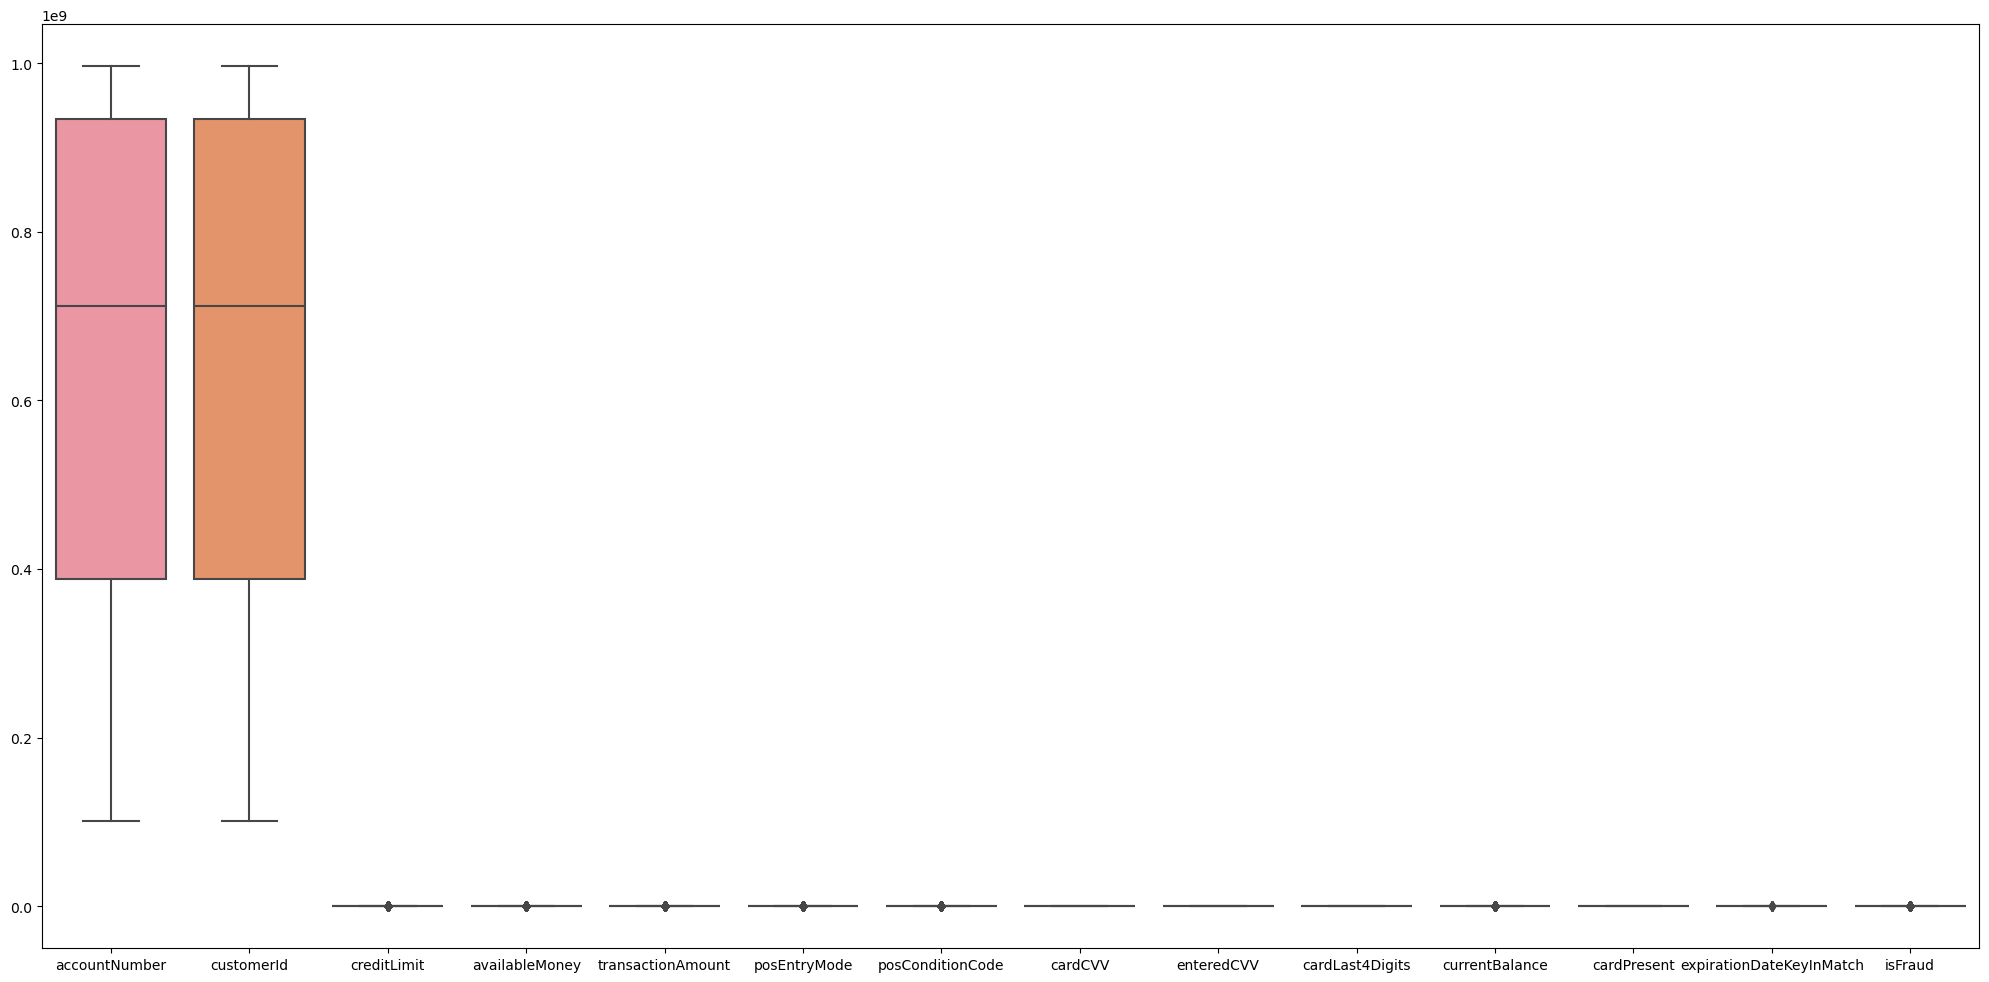

In [32]:
plt.figure(figsize=(25,12))
sns.boxplot(DF[num_col])

In [33]:
DF[cat_col].head()

,transactionDateTime,merchantName,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType
0,2016-08-13T14:27:32,Uber,US,US,rideshare,06/2023,2015-03-14,2015-03-14,PURCHASE
1,2016-10-11T05:05:54,AMC #191138,US,US,entertainment,02/2024,2015-03-14,2015-03-14,PURCHASE
2,2016-11-08T09:18:39,Play Store,US,US,mobileapps,08/2025,2015-03-14,2015-03-14,PURCHASE
3,2016-12-10T02:14:50,Play Store,US,US,mobileapps,08/2025,2015-03-14,2015-03-14,PURCHASE
4,2016-03-24T21:04:46,Tim Hortons #947751,US,US,fastfood,10/2029,2015-08-06,2015-08-06,PURCHASE


In [34]:
def cast_cat(df):
    for i in df.columns:
        # Check if the column data type is object (categorical)
        if df[i].dtype == 'O':  # This checks for object/categorical columns
            # Convert the column to numeric, forcing errors to NaN
            df[i] = pd.to_numeric(df[i], errors='coerce')
            # Convert numeric columns to integers (optional, after coercion)
            df[i] = df[i].fillna(0).astype(int)
    return df


In [35]:
cast_cat(DF)
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   accountNumber             10000 non-null  int64  
 1   customerId                10000 non-null  int64  
 2   creditLimit               10000 non-null  float64
 3   availableMoney            10000 non-null  float64
 4   transactionDateTime       10000 non-null  int32  
 5   transactionAmount         10000 non-null  float64
 6   merchantName              10000 non-null  int32  
 7   acqCountry                10000 non-null  int32  
 8   merchantCountryCode       10000 non-null  int32  
 9   posEntryMode              10000 non-null  float64
 10  posConditionCode          10000 non-null  float64
 11  merchantCategoryCode      10000 non-null  int32  
 12  currentExpDate            10000 non-null  int32  
 13  accountOpenDate           10000 non-null  int32  
 14  dateOfL

<Axes: >

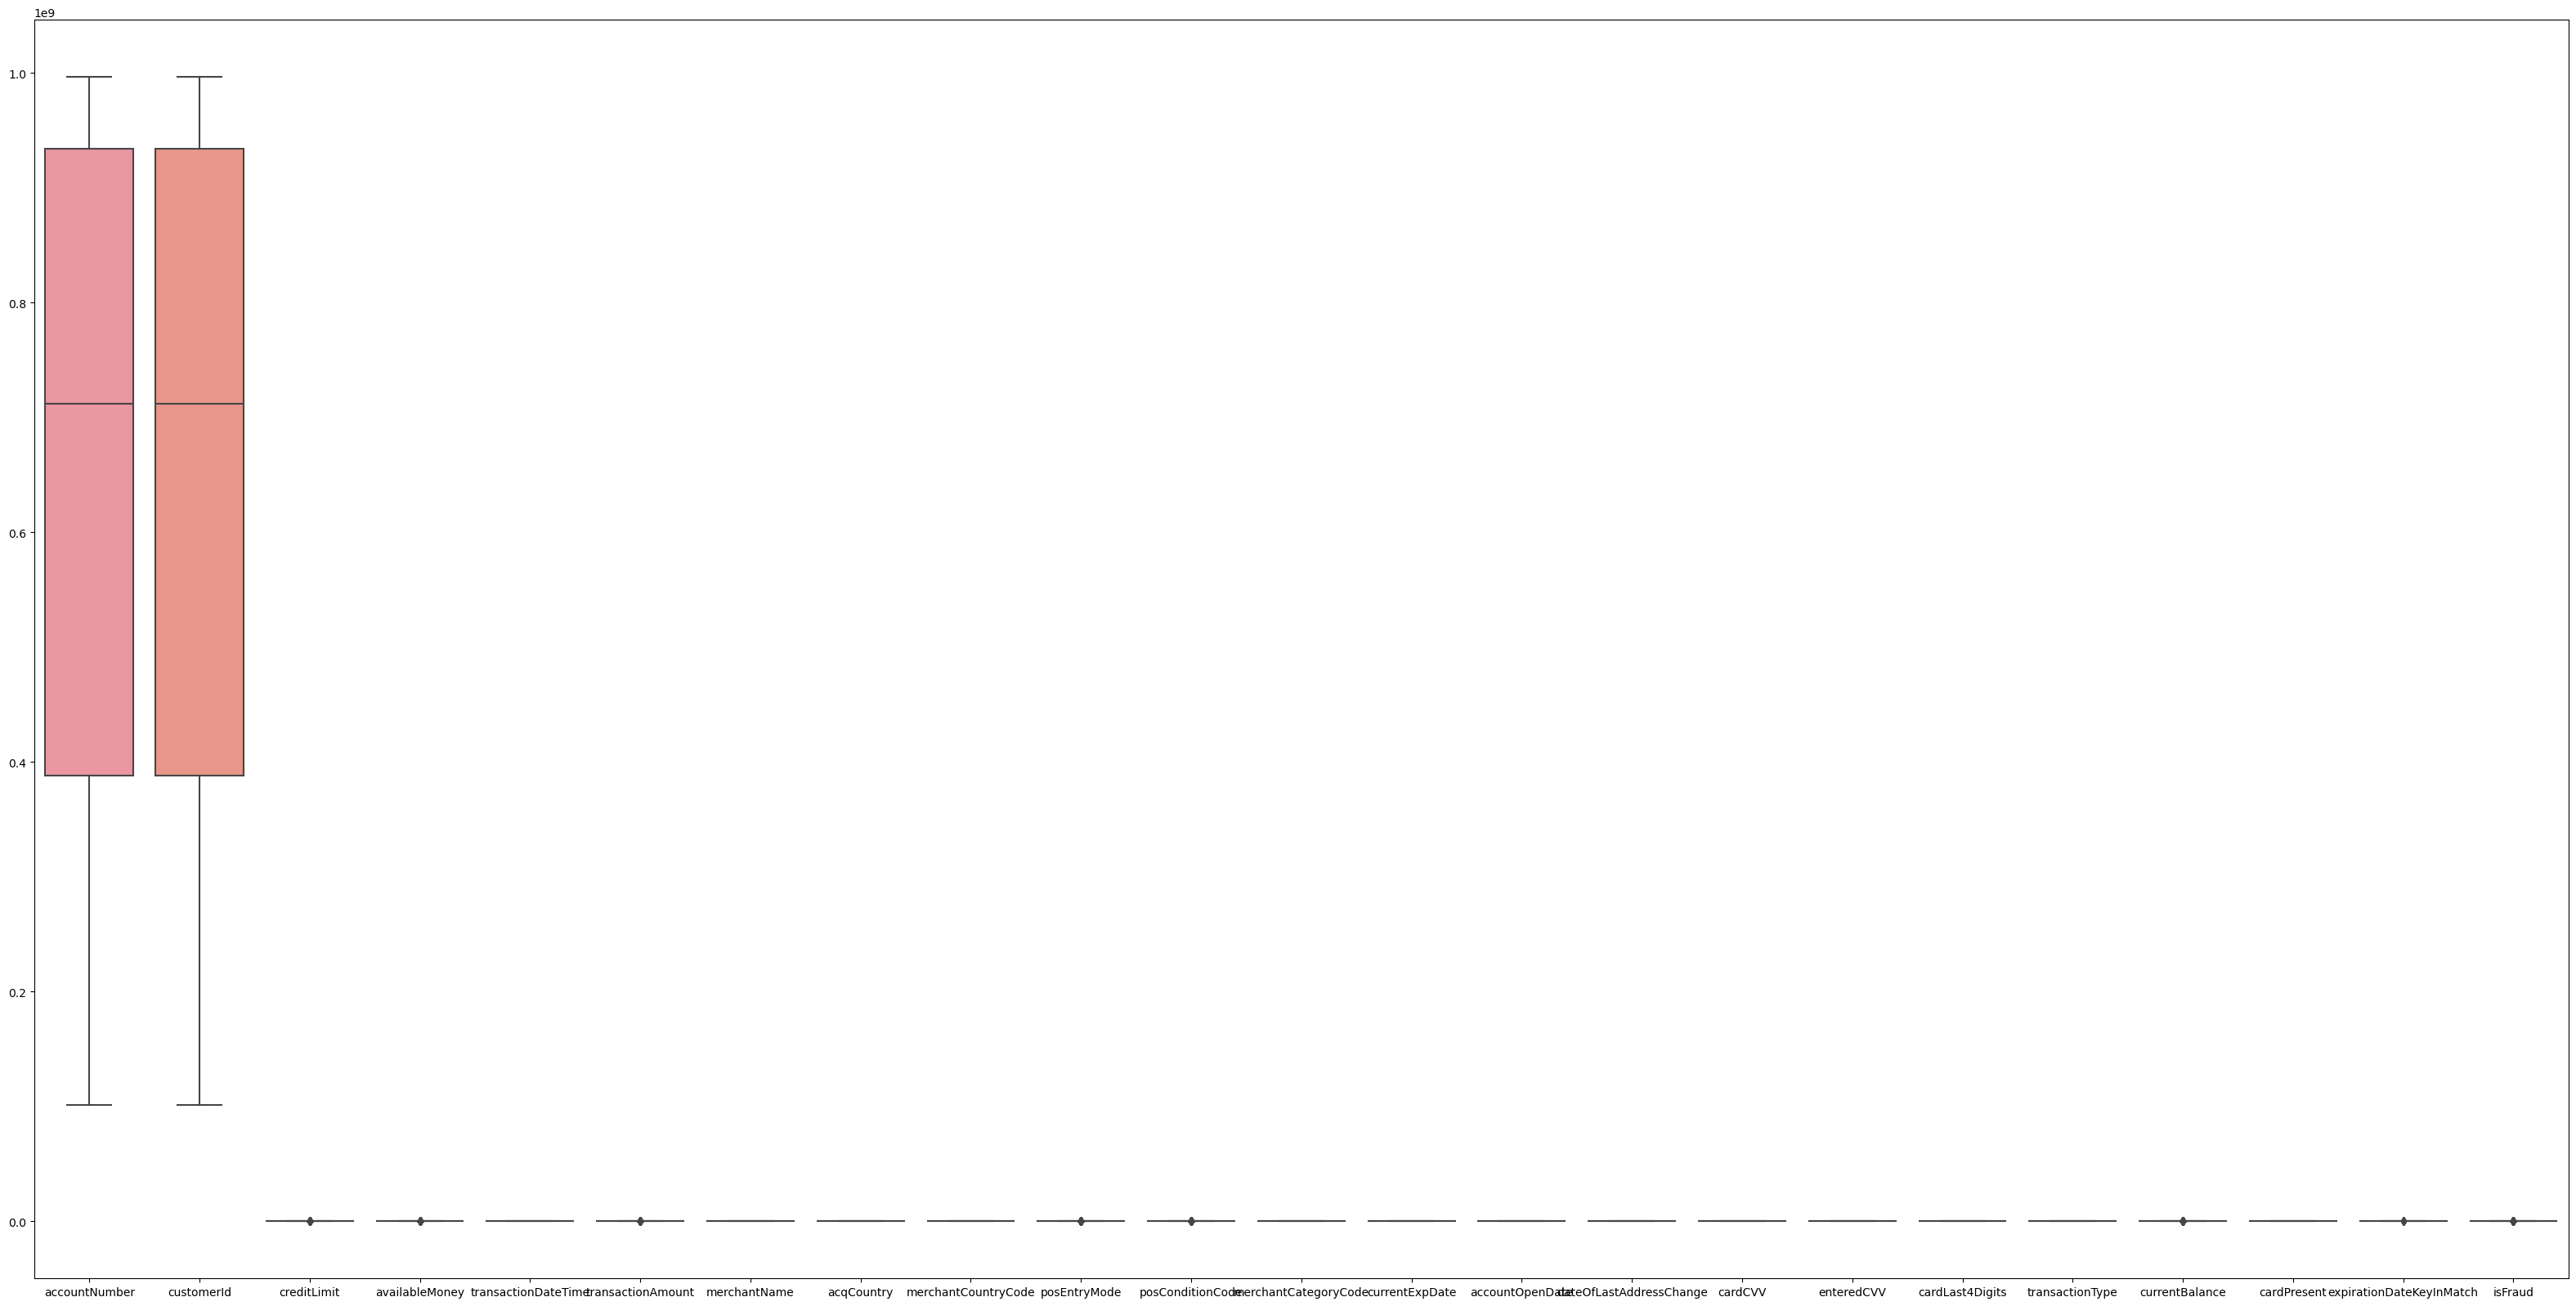

In [36]:
plt.figure(figsize=(40,20))
sns.boxplot(DF)

In [37]:
'''from scipy.stats import zscore

# Loop through each numerical column and calculate the Z-score
for column in DF.select_dtypes(include='number').columns:
    z_scores = zscore(DF[column])
    outliers = DF[abs(z_scores) > 3]  # Z-score threshold of 3
    print(f"Outliers for {column}:")
    print(outliers)'''


'from scipy.stats import zscore\n\n# Loop through each numerical column and calculate the Z-score\nfor column in DF.select_dtypes(include=\'number\').columns:\n    z_scores = zscore(DF[column])\n    outliers = DF[abs(z_scores) > 3]  # Z-score threshold of 3\n    print(f"Outliers for {column}:")\n    print(outliers)'

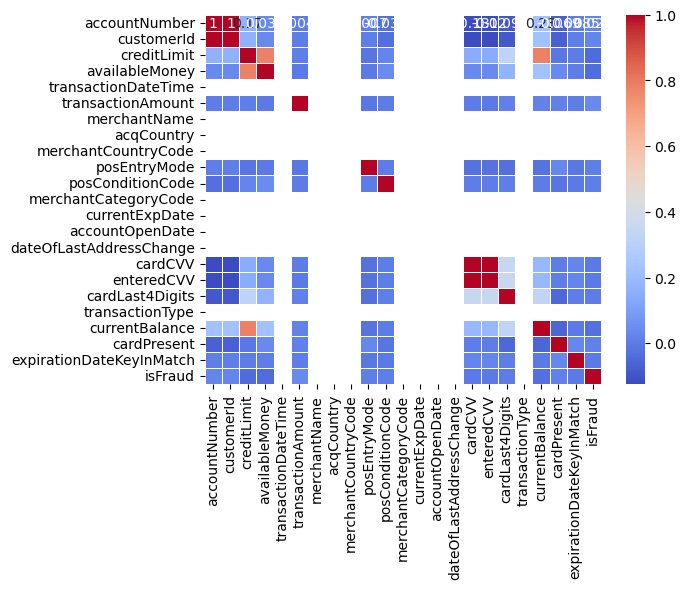

In [38]:
correlation_matrix = DF.corr()  # Correlation between columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()


Outliers detected using Z-score: 1481 rows
Outliers detected using IQR: 4013 rows


<Figure size 2000x1500 with 0 Axes>

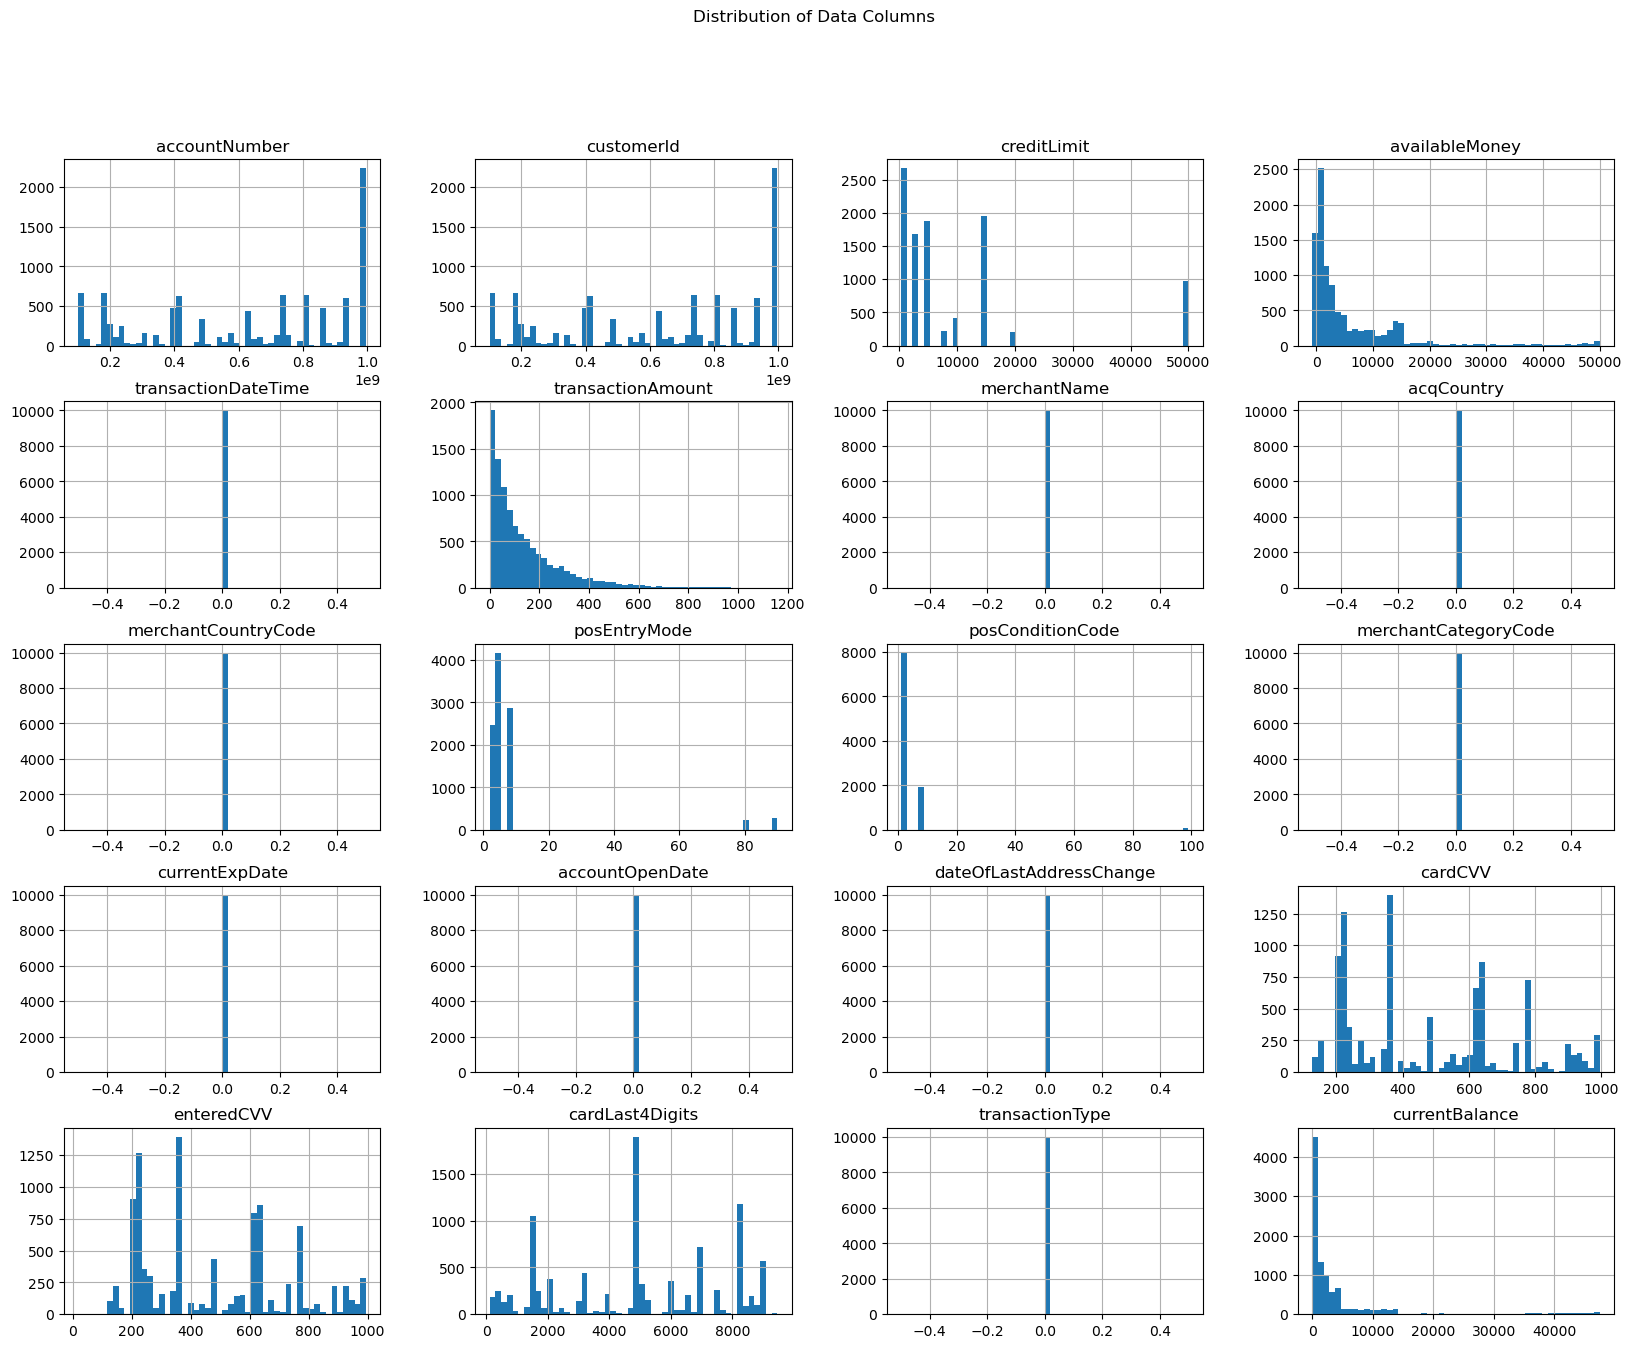

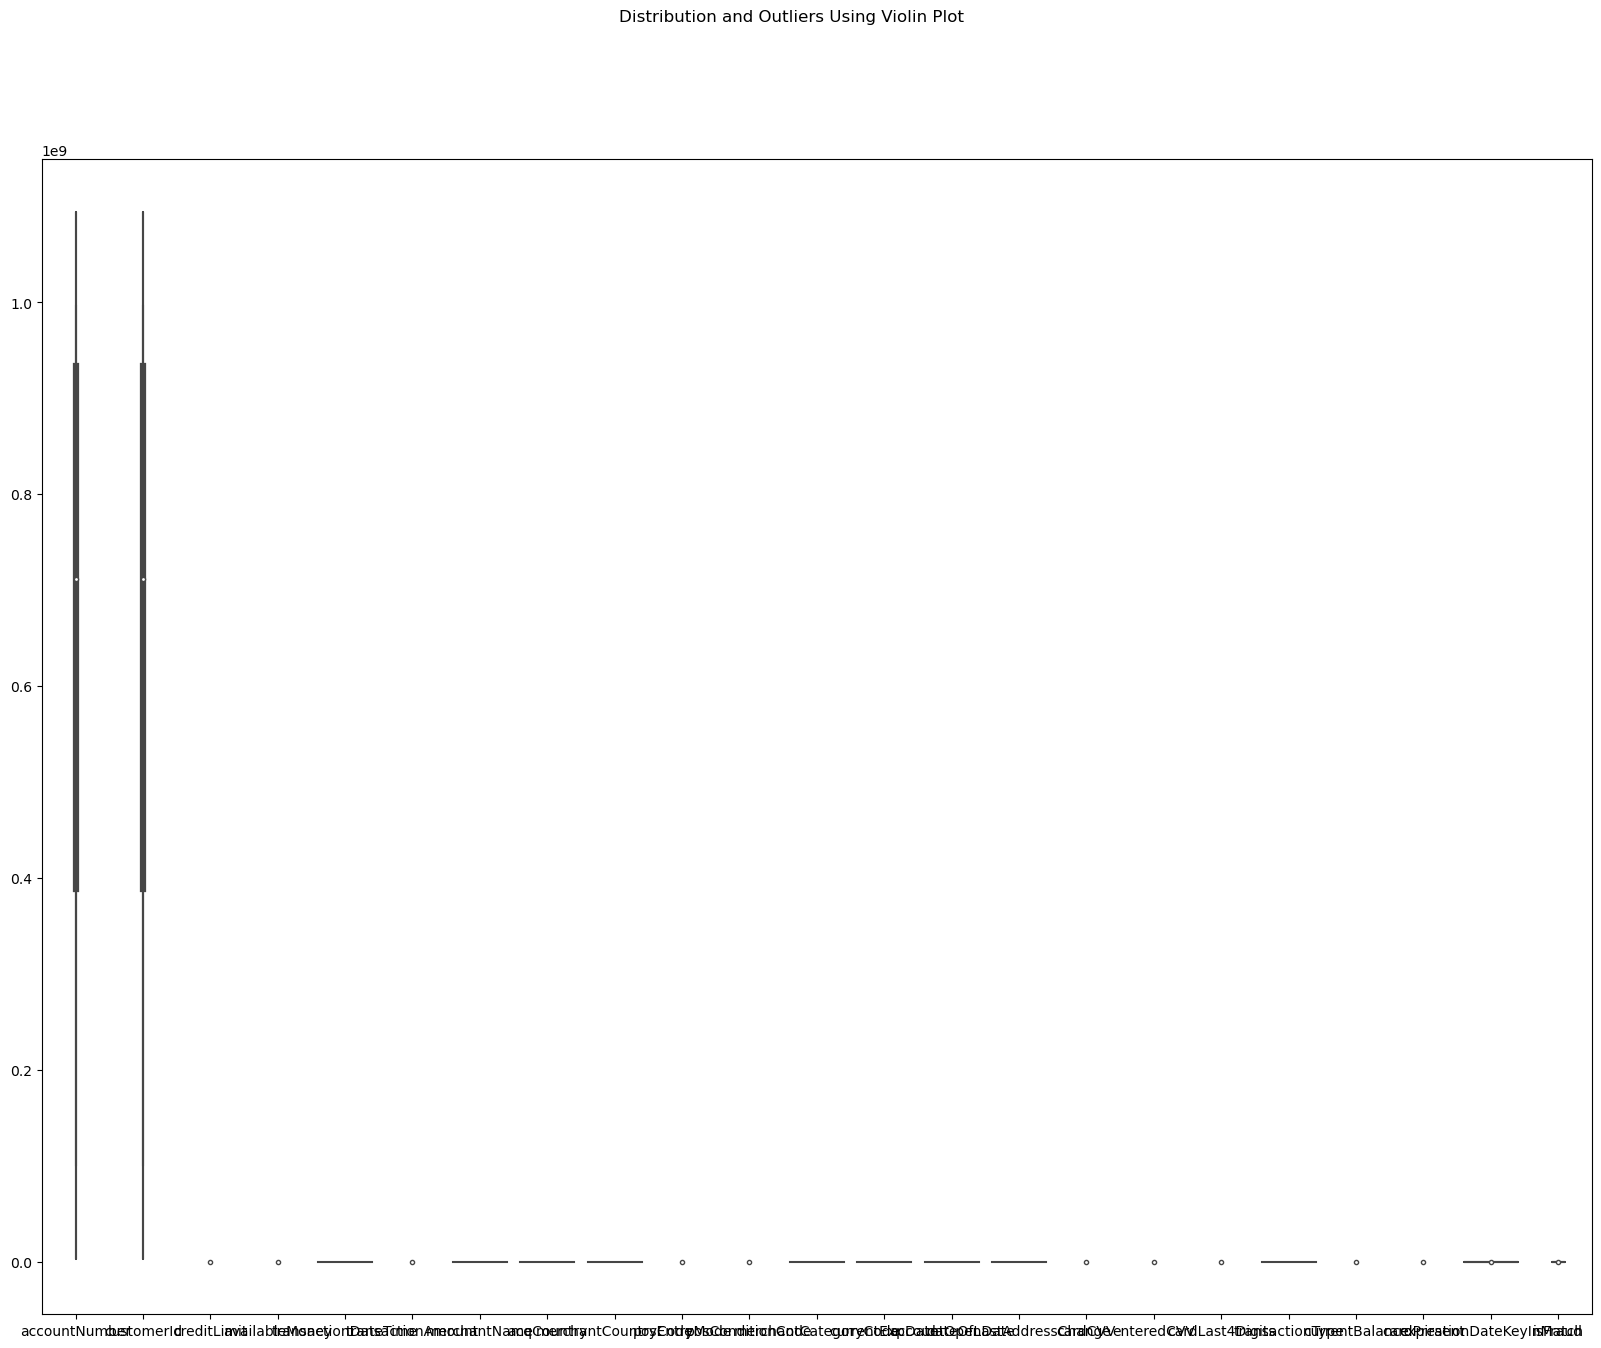

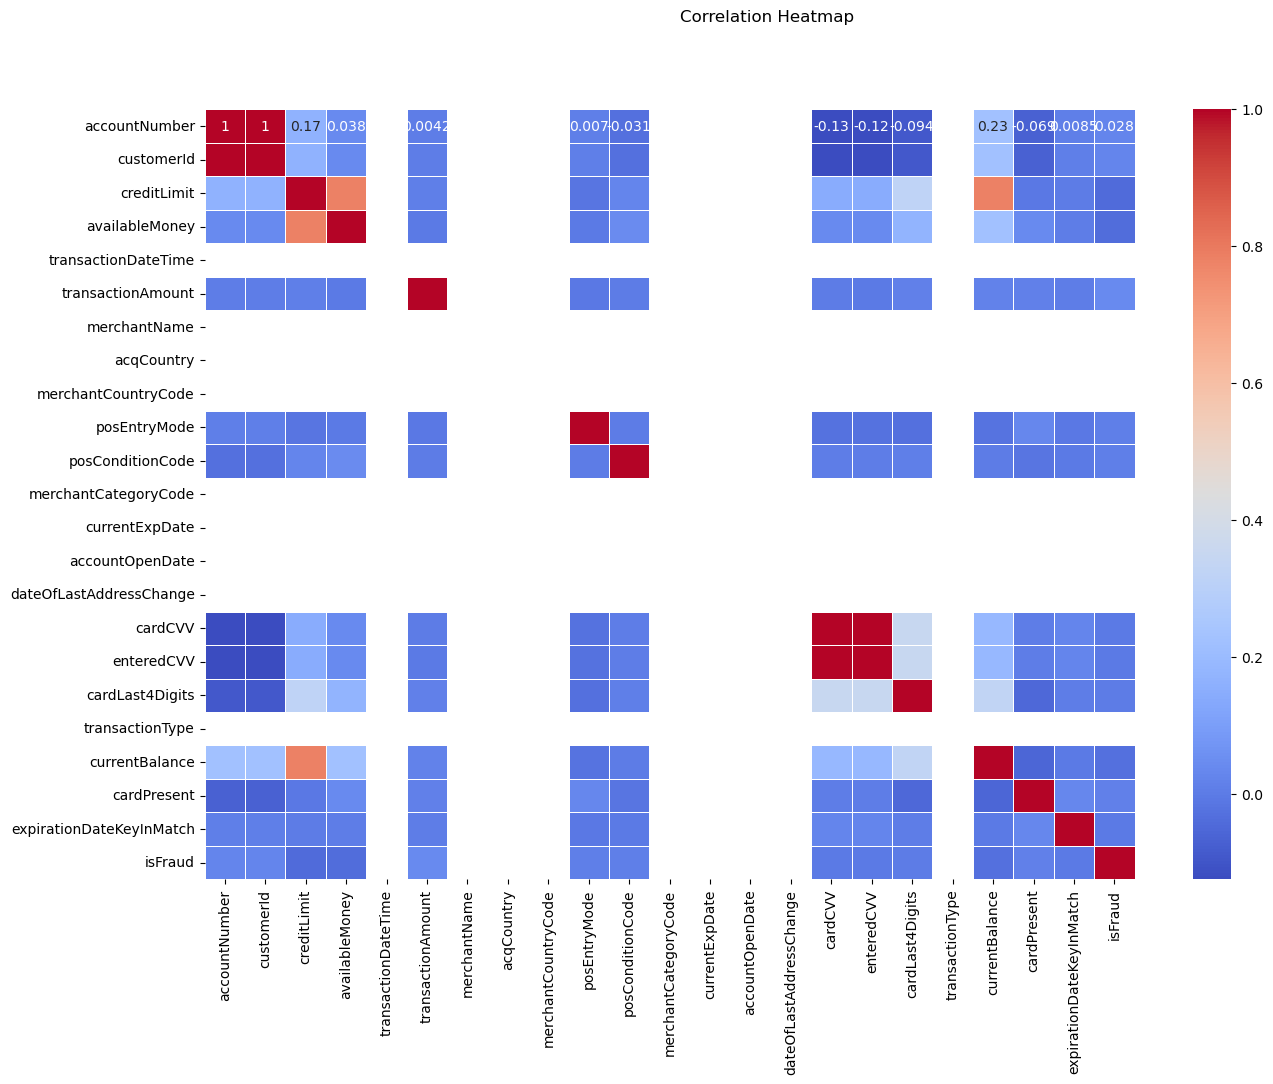

,Feature,Mean,Median,Min,Max,Z-Score Outliers Count,IQR Outliers Count
0,accountNumber,6.266151e+08,7.115369e+08,1.013807e+08,9.963628e+08,0,0
1,customerId,6.266151e+08,7.115369e+08,1.013807e+08,9.963628e+08,0,0
2,creditLimit,1.031192e+04,5.000000e+03,2.500000e+02,5.000000e+04,0,967
3,availableMoney,5.761775e+03,2.103130e+03,-7.457100e+02,5.000000e+04,334,630
4,transactionDateTime,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
5,transactionAmount,1.359956e+02,8.524500e+01,0.000000e+00,1.158350e+03,194,522
6,merchantName,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
7,acqCountry,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
8,merchantCountryCode,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
9,posEntryMode,9.487900e+00,5.000000e+00,2.000000e+00,9.000000e+01,507,507


Empty DataFrame
Columns: []
Index: []
There are 1481 accounts with credit limits above the threshold ($100,000). These may represent premium customers, but should also be evaluated for risk.
There are 1481 accounts with low available money, which may indicate financial distress or errors.
There are 1481 transactions with amounts above the threshold ($5000). These should be reviewed for potential fraud or high-value customers.


In [39]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Z-score Method for detecting outliers
def detect_outliers_zscore(df, threshold=3):
    # Select only numeric columns for Z-score calculation
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Calculate Z-scores for all numeric columns
    z_scores = numeric_df.apply(zscore, nan_policy='omit')  
    # Outliers based on Z-score threshold (greater than threshold or less than negative threshold)
    outliers_z = (z_scores > threshold) | (z_scores < -threshold)
    
    return outliers_z

# IQR Method for detecting outliers
def detect_outliers_iqr(df):
    # Select only numeric columns for IQR calculation
    df = df.select_dtypes(include=[np.number])
    
    # Calculate the 1st and 3rd quartile and IQR (Inter-Quartile Range)
    Q1 = df.quantile(0.25)  
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine outliers based on IQR rule (1.5 times IQR above Q3 or below Q1)
    outliers_iqr = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    
    return outliers_iqr

# Apply outlier detection methods
outliers_z = detect_outliers_zscore(DF)
outliers_iqr = detect_outliers_iqr(DF)

# Filter rows with outliers for analysis
outlier_data_z = DF[outliers_z.any(axis=1)]  # Rows with at least one outlier based on Z-score
outlier_data_iqr = DF[outliers_iqr.any(axis=1)]  # Rows with at least one outlier based on IQR

# Optionally display or analyze outliers
print(f"Outliers detected using Z-score: {outlier_data_z.shape[0]} rows")
print(f"Outliers detected using IQR: {outlier_data_iqr.shape[0]} rows")


# 1. Descriptive Statistics for all columns
desc_stats = DF.describe()

# 2. Check for business-specific outliers like high transaction amounts or large credit limits
high_transaction_outliers = DF[DF['transactionAmount'] > 5000]  # Customize threshold as needed
high_credit_limit_outliers = DF[DF['creditLimit'] > 100000]

# 3. Visualizations for all columns
# Histograms to visualize distributions
plt.figure(figsize=(20, 15))
DF.hist(bins=50, figsize=(20, 15))
plt.suptitle('Distribution of Data Columns')
plt.show()

# Violin plots for distribution
plt.figure(figsize=(20, 15))
sns.violinplot(data=DF)
plt.suptitle('Distribution and Outliers Using Violin Plot')
plt.show()

# Heatmap of correlations (helps identify relationships between features)
plt.figure(figsize=(15, 10))
correlation_matrix = DF.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.suptitle('Correlation Heatmap')
plt.show()

# 4. Outlier Summary Report for all columns
import pandas as pd
import numpy as np
from IPython.display import display

def generate_outlier_report_table(df, outliers_z, outliers_iqr):
    report = {
        "Feature": [],
        "Mean": [],
        "Median": [],
        "Min": [],
        "Max": [],
        "Z-Score Outliers Count": [],
        "IQR Outliers Count": []
    }
    
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    
    for column in numeric_df.columns:
        # Add basic statistics to the report
        report["Feature"].append(column)
        report["Mean"].append(numeric_df[column].mean())
        report["Median"].append(numeric_df[column].median())
        report["Min"].append(numeric_df[column].min())
        report["Max"].append(numeric_df[column].max())
        
        # Count the number of outliers detected by Z-score and IQR
        report["Z-Score Outliers Count"].append(outliers_z[column].sum())
        report["IQR Outliers Count"].append(outliers_iqr[column].sum())
    
    # Convert the report dictionary into a DataFrame
    report_df = pd.DataFrame(report)
    
    # Display the report table in the notebook
    display(report_df)

# Example usage
# Assuming `df` is your data, `outliers_z` and `outliers_iqr` are boolean DataFrames indicating outliers
# Replace these placeholders with actual DataFrames
# generate_outlier_report_table(df, outliers_z, outliers_iqr)


# Generate outlier report for all columns
outlier_report = generate_outlier_report_table(DF, outliers_z, outliers_iqr)

# Convert to DataFrame for better presentation
report_df = pd.DataFrame(outlier_report).T
print(report_df)

# 5. Business Insights Based on Outliers
def generate_business_insights(df, outlier_data_z, outlier_data_iqr):
    insights = []
    
    for column in df.columns:
        # Example: Transaction Amount Insights
        if column == 'transactionAmount':
            high_transaction_insight = f"There are {len(outlier_data_z)} transactions with amounts above the threshold ($5000). These should be reviewed for potential fraud or high-value customers."
            insights.append(high_transaction_insight)

        # Example: Credit Limit Insights
        if column == 'creditLimit':
            high_credit_limit_insight = f"There are {len(outlier_data_z)} accounts with credit limits above the threshold ($100,000). These may represent premium customers, but should also be evaluated for risk."
            insights.append(high_credit_limit_insight)
        
        # Example: Available Money Insights
        if column == 'availableMoney':
            low_balance_insight = f"There are {len(outlier_data_z)} accounts with low available money, which may indicate financial distress or errors."
            insights.append(low_balance_insight)
    
    return insights

# Generate business insights for outliers
business_insights = generate_business_insights(DF, outlier_data_z, outlier_data_iqr)

# Print business insights
for insight in business_insights:
    print(insight)

# Short Report based on Outlier Analysis

### **Short Report:**
- **Credit Limit**: 967 outliers (Above $100,000)  
  - **Action**: Review for premium customers or risk.
  
- **Available Money**: 630 outliers (Negative values or unusually low)  
  - **Action**: Flag for errors or potential financial distress.
  
- **Transaction Amount**: 522 outliers (Above $5,000)  
  - **Action**: Review for fraud or high-value transactions.

---

### **Conclusion:**
- **Features to Drop**:  
  - `transactionDateTime`, `merchantName`, `acqCountry`, `merchantCountryCode` (These features contain no meaningful data for analysis).
  
- **What to Do Now**:  
  - Review accounts with high credit limits (above $100,000) as potential premium customers or assess risk.
  - Investigate accounts with low available money or negative values for potential errors or financial distress.
  - Flag transactions over $5,000 for potential fraud or high-value customer review.
"""




In [40]:
col = ['transactionDateTime', 'merchantName', 'acqCountry','merchantCountryCode']
DF.drop(col,axis=1,inplace=True)

In [41]:
DF.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionAmount', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [42]:
DF[['creditLimit','availableMoney','transactionAmount']].describe()

,creditLimit,availableMoney,transactionAmount
count,10000.000000,10000.000000,10000.000000
mean,10311.925000,5761.775072,135.995562
std,14107.608284,9034.735102,147.916355
min,250.000000,-745.710000,0.000000
25%,1000.000000,531.655000,32.905000
50%,5000.000000,2103.130000,85.245000
75%,15000.000000,7500.000000,189.800000
max,50000.000000,50000.000000,1158.350000


In [43]:
DF.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionAmount', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [44]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   accountNumber             10000 non-null  int64  
 1   customerId                10000 non-null  int64  
 2   creditLimit               10000 non-null  float64
 3   availableMoney            10000 non-null  float64
 4   transactionAmount         10000 non-null  float64
 5   posEntryMode              10000 non-null  float64
 6   posConditionCode          10000 non-null  float64
 7   merchantCategoryCode      10000 non-null  int32  
 8   currentExpDate            10000 non-null  int32  
 9   accountOpenDate           10000 non-null  int32  
 10  dateOfLastAddressChange   10000 non-null  int32  
 11  cardCVV                   10000 non-null  int64  
 12  enteredCVV                10000 non-null  int64  
 13  cardLast4Digits           10000 non-null  int64  
 14  transac

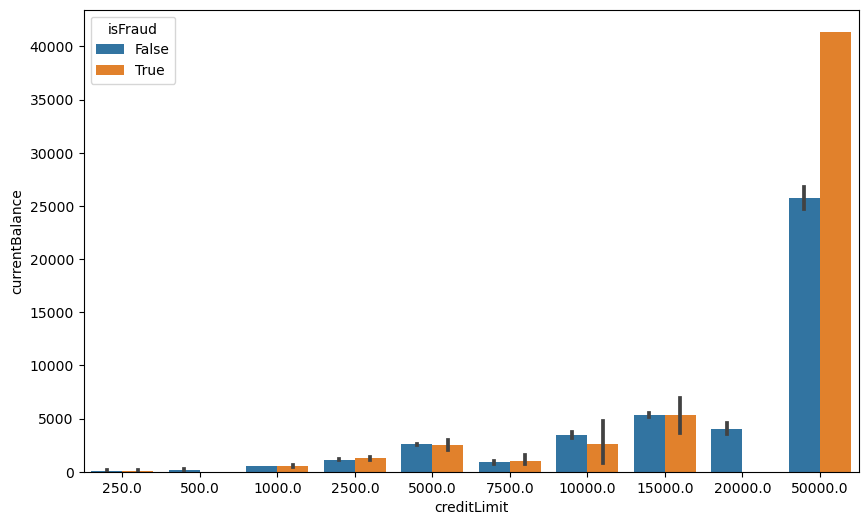

In [45]:
# Convert the `isFraud` column to string or category
plt.figure(figsize=(10,6))
DF['isFraud'] = DF['isFraud'].astype(str)
sns.barplot(data=DF,x='creditLimit',y='currentBalance',hue='isFraud')
plt.show()

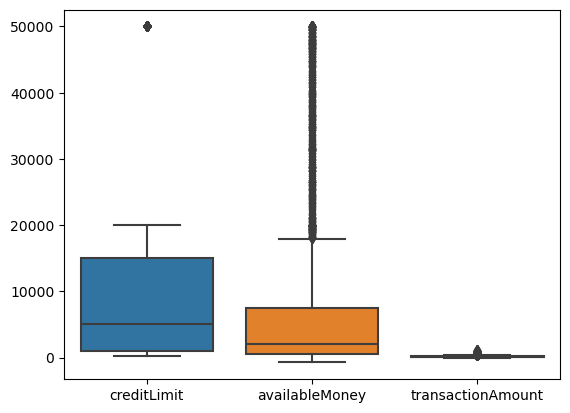

In [46]:
sns.boxplot(data=DF[['creditLimit', 'availableMoney', 'transactionAmount']])
plt.show()


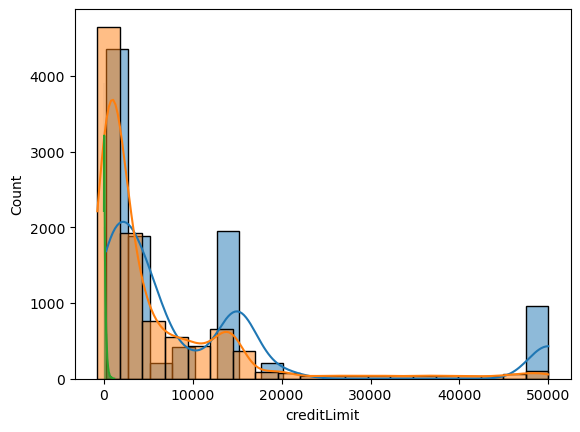

In [47]:
sns.histplot(DF['creditLimit'], bins=20, kde=True)
sns.histplot(DF['availableMoney'], bins=20, kde=True)
sns.histplot(DF['transactionAmount'], bins=20, kde=True)
plt.show()


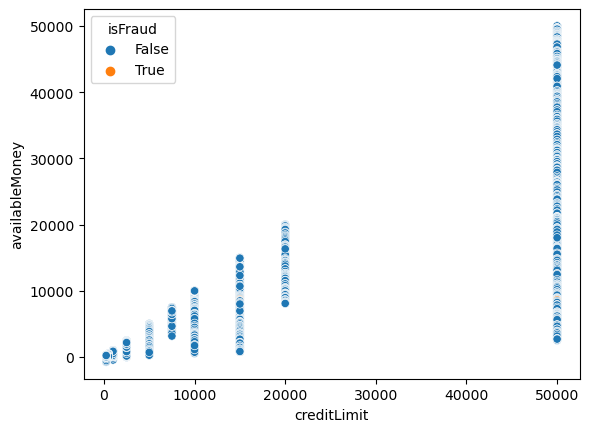

In [48]:
sns.scatterplot(data=DF, x='creditLimit', y='availableMoney', hue='isFraud')
plt.show()


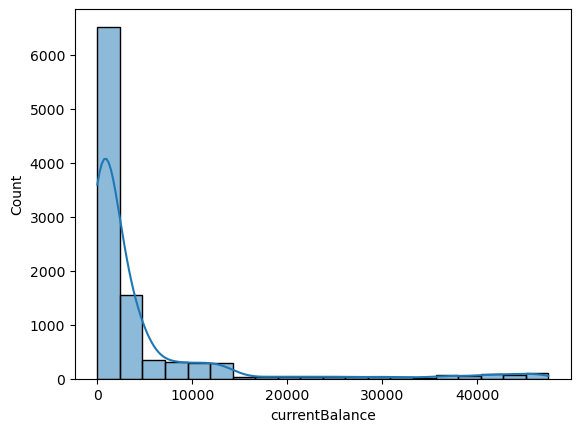

In [49]:
sns.histplot(DF['currentBalance'], bins=20, kde=True)
plt.show()


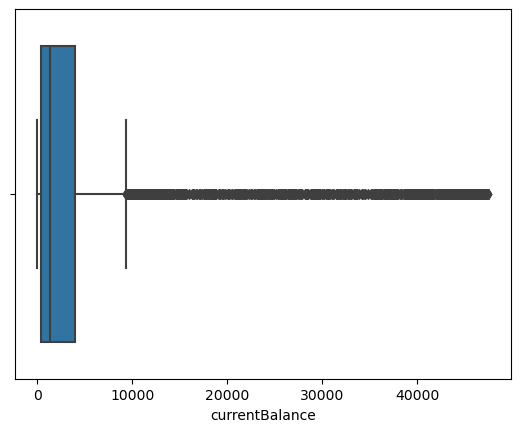

In [50]:
sns.boxplot(data=DF, x='currentBalance')
plt.show()


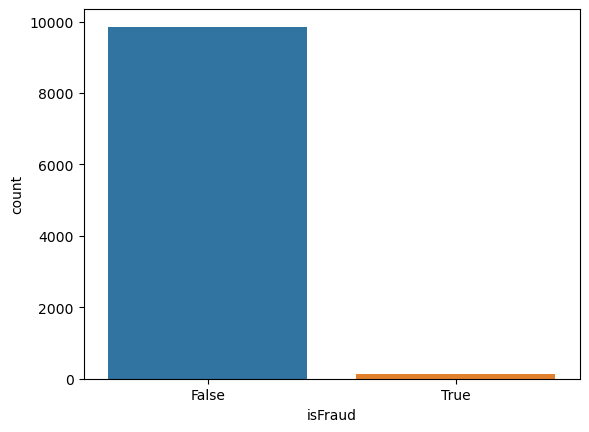

In [51]:
sns.countplot(data=DF, x='isFraud')
plt.show()


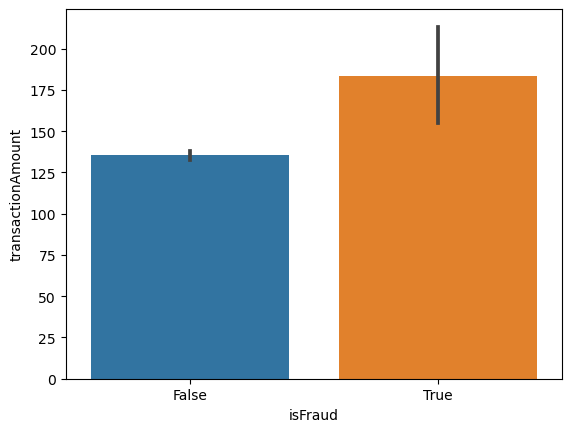

In [52]:
sns.barplot(data=DF, x='isFraud', y='transactionAmount')
plt.show()


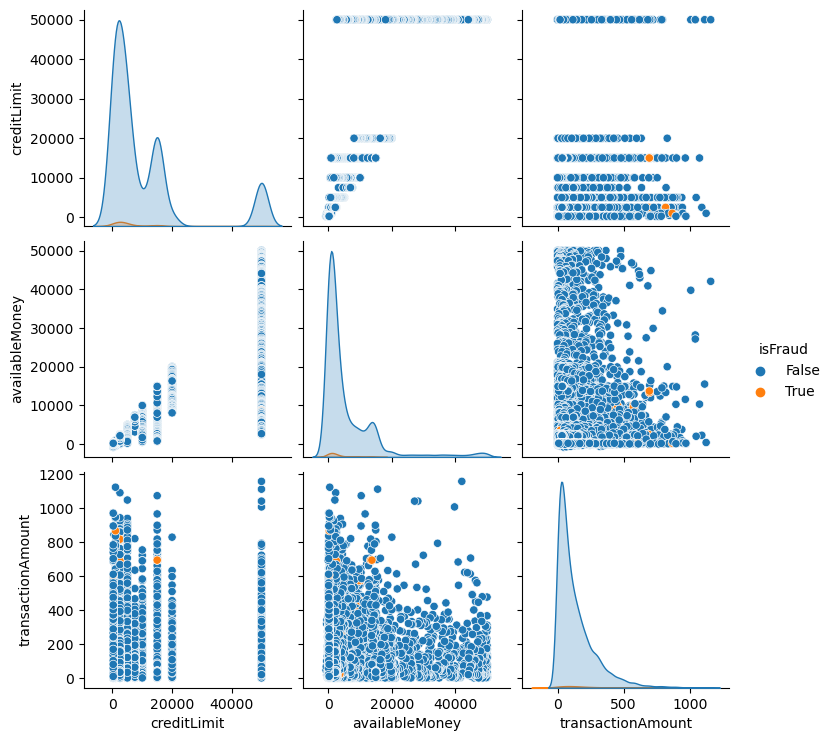

In [53]:
sns.pairplot(DF, vars=['creditLimit', 'availableMoney', 'transactionAmount'], hue='isFraud')
plt.show()


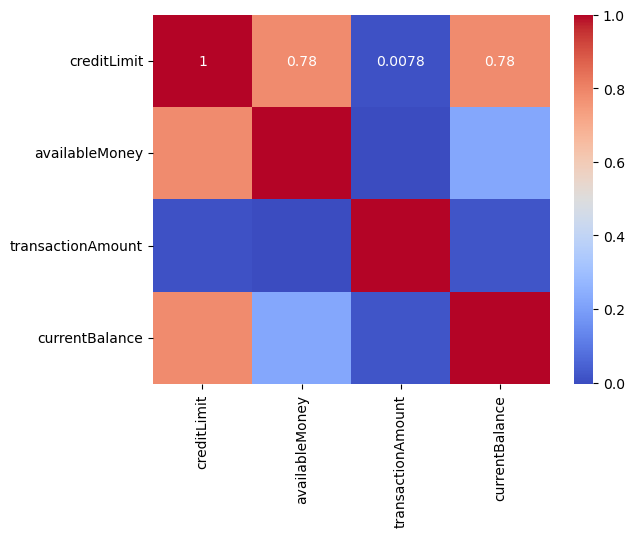

In [54]:
corr = DF[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


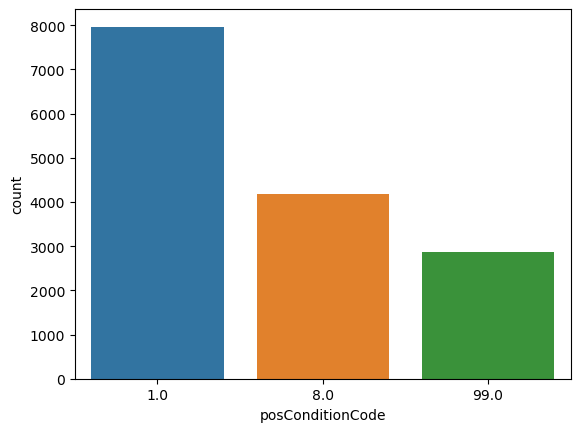

In [55]:
sns.countplot(data=DF, x='posEntryMode')
sns.countplot(data=DF, x='posConditionCode')
plt.show()
